Prepare a classification model using Naive Bayes 
for salary data 

Data Description:

- age -- age of a person
- workclass	-- A work class is a grouping of work 
- education	-- Education of an individuals	
- maritalstatus -- Marital status of an individulas	
- occupation	 -- occupation of an individuals
- relationship -- 	
- race --  Race of an Individual
- sex --  Gender of an Individual
- capitalgain --  profit received from the sale of an investment	
- capitalloss	-- A decrease in the value of a capital asset
- hoursperweek -- number of hours work per week	
- native -- Native of an individual
- Salary -- salary of an individual

In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [2]:
salary_train = pd.read_csv("C:\\Users\\jhishna2022\\Downloads\\SalaryData_Train.csv")
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
salary_test = pd.read_csv("C:\\Users\\jhishna2022\\Downloads\\SalaryData_Test.csv")
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


### EDA

In [4]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
salary_train['Salary'].value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [6]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [7]:
salary_test['Salary'].value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

#### Label Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder
s_train = salary_train.apply(LabelEncoder().fit_transform)

In [9]:
s_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0


In [10]:
s_test = salary_test.apply(LabelEncoder().fit_transform)
s_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0


- <= 50k is labelled as 0 , > 50k  is labelled as 1

#### Dividing into X and Y variable 

In [11]:
X_train = s_train.iloc[:,:-1]
Y_train = s_train.iloc[:,-1]
X_test = s_test.iloc[:,:-1]
Y_test = s_test.iloc[:,-1]

### Multinomial Naive Bayes Model

In [12]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train,Y_train)

MultinomialNB()

##### calculating accuracy of train data

In [13]:
y_train_pred = mnb.predict(X_train)
y_train_pred

array([1, 0, 0, ..., 0, 0, 1])

In [14]:
from sklearn import metrics
print("Multinomial Naive Bayes model accuracy : ", metrics.accuracy_score(Y_train, y_train_pred))
print("Multinomial Naive Bayes model accuracy(in %): ", metrics.accuracy_score(Y_train, y_train_pred)*100)

Multinomial Naive Bayes model accuracy :  0.7792513510825237
Multinomial Naive Bayes model accuracy(in %):  77.92513510825238


##### calculating accuracy of test data

In [15]:
y_test_pred = mnb.predict(X_test)
y_test_pred

array([0, 0, 0, ..., 0, 1, 0])

In [16]:
print("Test Accuracy is : ", metrics.accuracy_score(Y_test, y_test_pred))
print("Test Accuracy is(in %) : ", metrics.accuracy_score(Y_test, y_test_pred)*100)

Test Accuracy is :  0.7800796812749003
Test Accuracy is(in %) :  78.00796812749003


In [17]:
cm = confusion_matrix(Y_test, y_test_pred)
cm

array([[10631,   729],
       [ 2583,  1117]], dtype=int64)

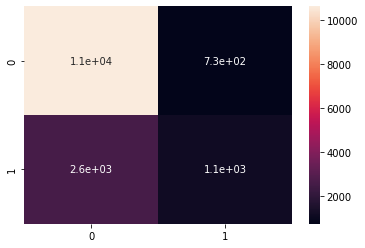

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot = True)
plt.show()

### Gaussian Naive Bayes Model

In [19]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

##### calculating accuracy of train data

In [20]:
y_pred_train = gnb.predict(X_train)
y_pred_train

array([1, 0, 0, ..., 0, 0, 1])

In [21]:
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy : ", metrics.accuracy_score(Y_train, y_pred_train))
print("Gaussian Naive Bayes model accuracy(in %): ", metrics.accuracy_score(Y_train, y_pred_train)*100)

Gaussian Naive Bayes model accuracy :  0.8120751964457412
Gaussian Naive Bayes model accuracy(in %):  81.20751964457412


##### calculating accuracy of test data

In [22]:
y_pred_test = gnb.predict(X_test)
y_pred_test

array([0, 0, 0, ..., 1, 1, 1])

In [23]:
print("Test Accuracy of Gaussian NB Model is : ", metrics.accuracy_score(Y_test, y_pred_test))
print("Test Accuracy of Gaussian NB Model is(in %) : ", metrics.accuracy_score(Y_test, y_pred_test)*100)

Test Accuracy of Gaussian NB Model is :  0.8146746347941567
Test Accuracy of Gaussian NB Model is(in %) :  81.46746347941567


In [24]:
cm_gnb = confusion_matrix(Y_test, y_pred_test)
cm_gnb

array([[10506,   854],
       [ 1937,  1763]], dtype=int64)

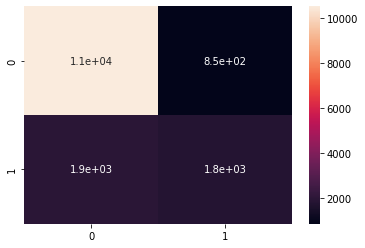

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm_gnb, annot = True)
plt.show()

#### Applying GridsearchCV to improve the accuracy

In [26]:
import numpy as np
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [27]:
from sklearn.model_selection import GridSearchCV
nbModel_grid = GridSearchCV(estimator=gnb, param_grid=param_grid_nb, verbose=1, cv=10, scoring='accuracy')

In [28]:
nbModel_grid.fit(X_train, Y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=1e-05)


In [29]:
GaussianNB(priors=None, var_smoothing=1.0)

GaussianNB(var_smoothing=1.0)

In [30]:
y_prediction = nbModel_grid.predict(X_test)
y_prediction

array([0, 0, 0, ..., 1, 1, 1])

In [31]:
metrics.accuracy_score(Y_test, y_prediction)

0.8148738379814077

- Applying gridsearchcv also the accuracy remains almost same.